In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import chi2_contingency
import kagglehub

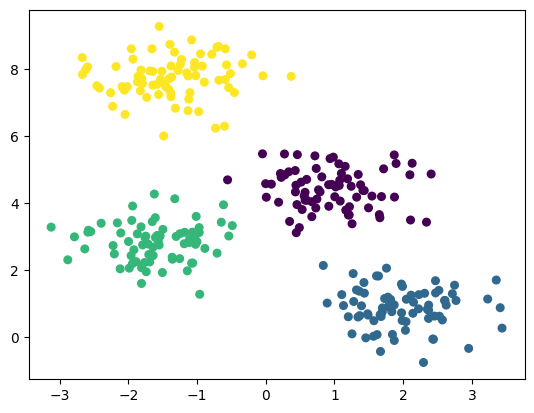

In [132]:
blobs_data = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = blobs_data[0]
y = blobs_data[1]

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap='viridis')


In [133]:
class KMeans_own:
    def __init__(self, k=4, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape
        # take random points as initial centroids
        random_sample_idxs = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_sample_idxs]

        for _ in range(self.max_iters):
            # create labels for each point based on closest centroid
            self.labels = self._assign_clusters(X)
            old_centroids = self.centroids.copy()
            # compute new centroids from the clusters
            self.centroids = self._compute_centroids(X)

            # repeat until convergence or max_iters reached
            if np.all(old_centroids == self.centroids):
                break

    def _assign_clusters(self, X):
        # take the closest centroid for each point
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        # compute actual centroids as the mean of all points assigned to each centroid
        centroids = np.zeros((self.k, X.shape[1]))
        for idx in range(self.k):
            points = X[self.labels == idx]
            centroids[idx] = points.mean(axis=0) if len(points) > 0 else self.centroids[idx]
        return centroids

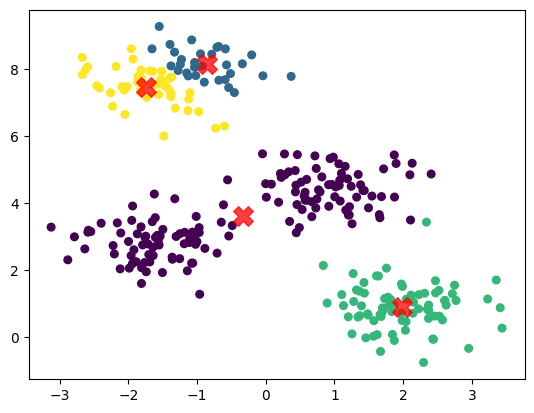

In [134]:
model = KMeans_own(k=4)
model.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels, s=30, cmap='viridis')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()

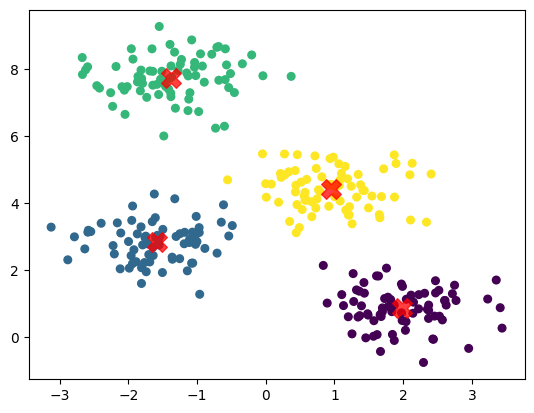

In [135]:
model_2 = KMeans(n_clusters=4)
model_2.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model_2.labels_, s=30, cmap='viridis')
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()

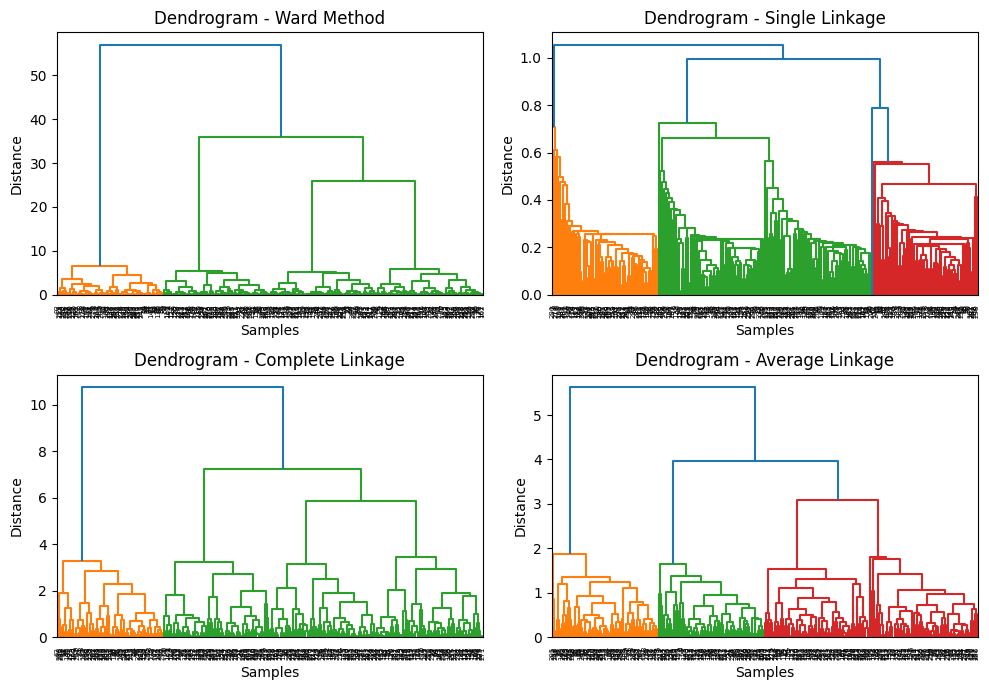

In [136]:
Z_1 = linkage(X, method='ward')
Z_2 = linkage(X, method='single')
Z_3 = linkage(X, method='complete')
Z_4 = linkage(X, method='average')
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
dendrogram(Z_1)
plt.title("Dendrogram - Ward Method")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.subplot(2, 2, 2)
dendrogram(Z_2)
plt.title("Dendrogram - Single Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.subplot(2, 2, 3)
dendrogram(Z_3)
plt.title("Dendrogram - Complete Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.subplot(2, 2, 4)
dendrogram(Z_4)
plt.title("Dendrogram - Average Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [142]:
iris = load_iris()
X_iris = iris.data

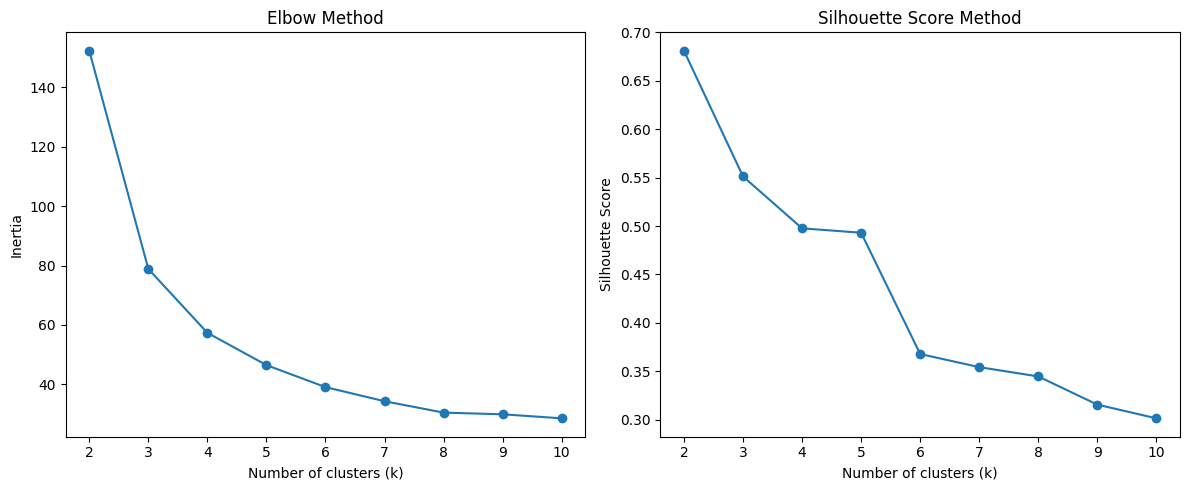

In [138]:
k_means_shilhouette = []
k_means_elbow = []
k_clusters = range(2, 11)

for k in k_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_iris)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_iris, labels)
    k_means_elbow.append(inertia)
    k_means_shilhouette.append(silhouette_avg)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_clusters, k_means_elbow, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.subplot(1, 2, 2)
plt.plot(k_clusters, k_means_shilhouette, marker='o')
plt.title("Silhouette Score Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sepal Width')

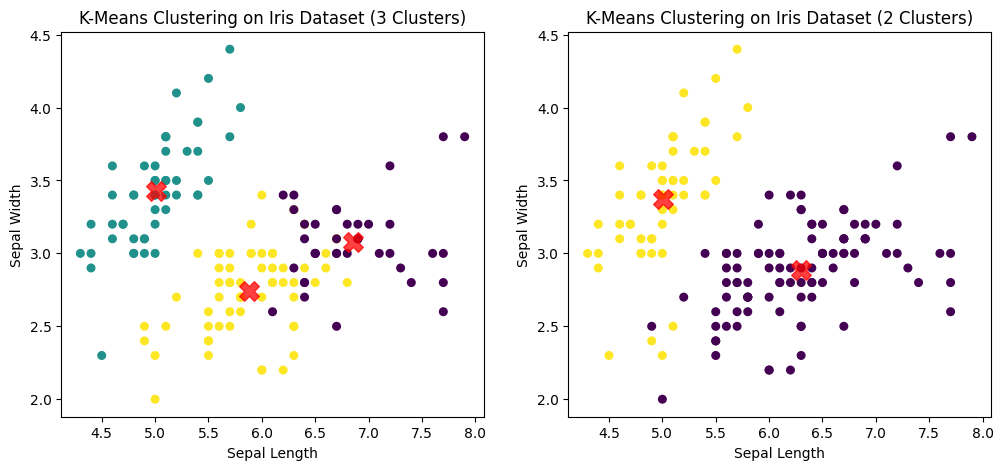

In [145]:
kmeans_iris_3 = KMeans(n_clusters=3, random_state=42)
kmeans_iris_3.fit(X_iris)
kmeans_iris_2 = KMeans(n_clusters=2, random_state=42)
kmeans_iris_2.fit(X_iris)
labels_iris_3 = kmeans_iris_3.labels_
labels_iris_2 = kmeans_iris_2.labels_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_iris_3, s=30, cmap='viridis')
plt.scatter(kmeans_iris_3.cluster_centers_[:, 0], kmeans_iris_3.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering on Iris Dataset (3 Clusters)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_iris_2, s=30, cmap='viridis')
plt.scatter(kmeans_iris_2.cluster_centers_[:, 0], kmeans_iris_2.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering on Iris Dataset (2 Clusters)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")


Looking at Elbow Method, the optimal $k$ of clusters should be $3$, where for Silhouette Score the best $k$ is $2$.

As we know the actual best $k$ is $3$ because of $3$ iris species given in the dataset.

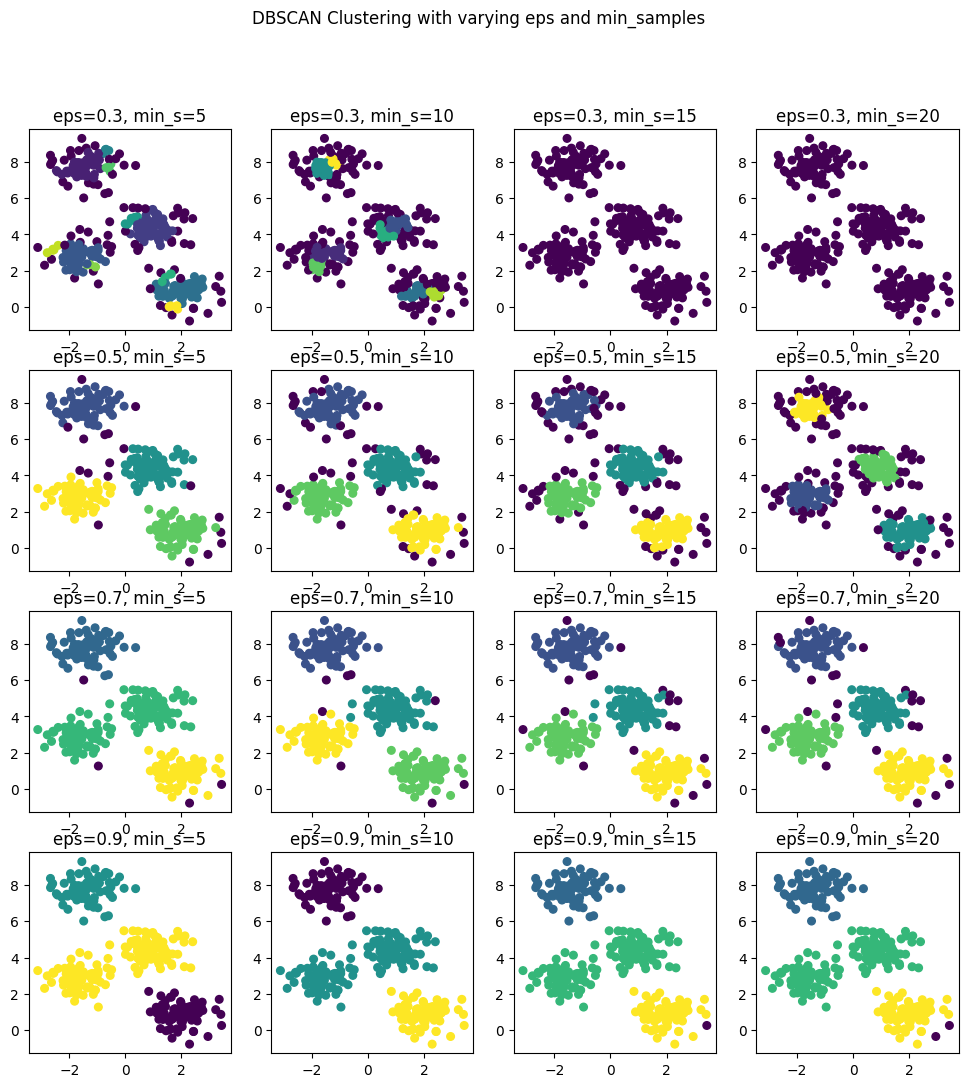

In [141]:
eps = [0.3, 0.5, 0.7, 0.9]
min_samples = [5, 10, 15, 20]

plt.figure(figsize=(12, 12))

for i, e in enumerate(eps):
    for j, m in enumerate(min_samples):
        model_dbscan = DBSCAN(eps=e, min_samples=m)
        model_dbscan.fit(X)
        plt.subplot(len(eps), len(min_samples), i * len(min_samples) + j + 1)
        plt.scatter(X[:, 0], X[:, 1], c=model_dbscan.labels_, s=30, cmap='viridis', label=f'eps={e}, min_samples={m}')
        plt.title(f'eps={e}, min_s={m}')
plt.suptitle("DBSCAN Clustering with varying eps and min_samples")
plt.show()

Here, darker elements are classified as noise.

A larger epsilon means a larger circle encasing the points, which results in fewer clusters when some are close to each other.

As with min_samples, larger values mean more points must fall within the circle to be considered part of a cluster.

We can see that the best solution here is eps $= 0.7$ and min_samples $= 10$, as this combination produces the fewest noise points.

Interestingly, in the bottom-left corner, an entire cluster is classified as noise.

In [ ]:
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

mall_data = pd.read_csv(path + '/Mall_Customers.csv')

Path to dataset files: /home/felix/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X_mall = mall_data.iloc[:, [2, 3]].values

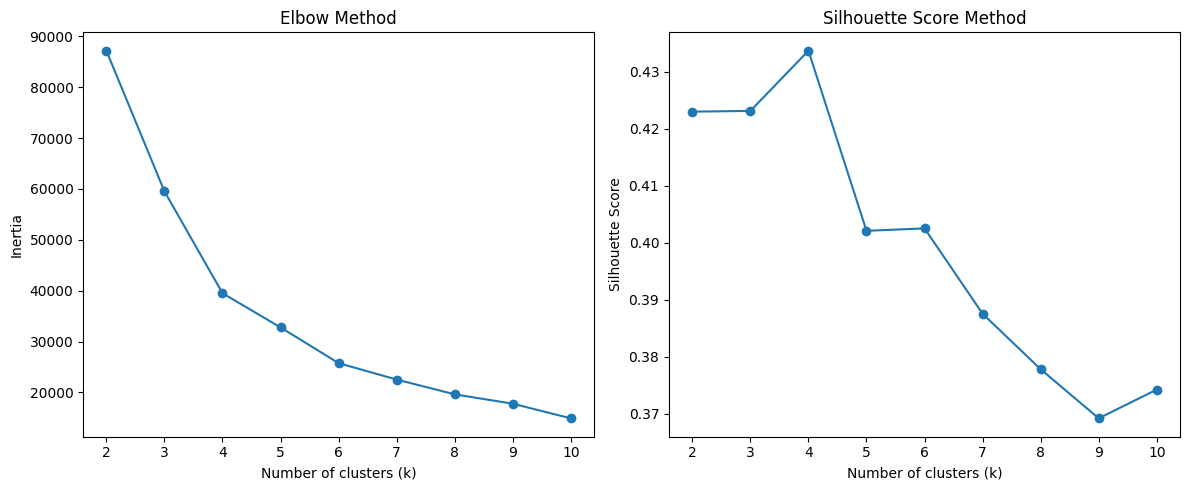

In [ ]:
k_means_shilhouette = []
k_means_elbow = []
k_clusters = range(2, 11)

for k in k_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_mall)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_mall, labels)
    k_means_elbow.append(inertia)
    k_means_shilhouette.append(silhouette_avg)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_clusters, k_means_elbow, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.subplot(1, 2, 2)
plt.plot(k_clusters, k_means_shilhouette, marker='o')
plt.title("Silhouette Score Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

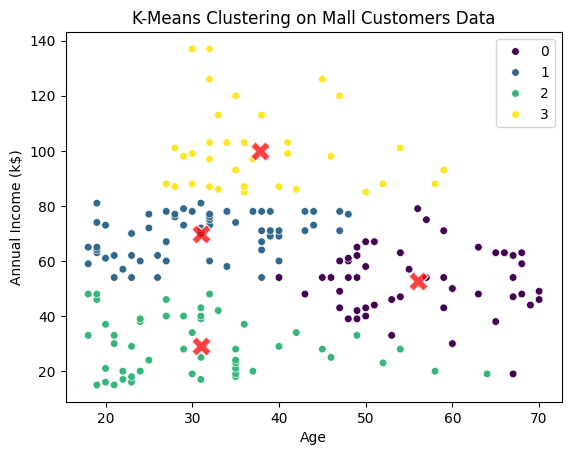

In [ ]:
kmeans_mall = KMeans(n_clusters=4, random_state=0)
kmeans_mall.fit(X_mall)

sns.scatterplot(x=X_mall[:, 0], y=X_mall[:, 1], hue=kmeans_mall.labels_, palette='viridis', s=30)
sns.scatterplot(x=kmeans_mall.cluster_centers_[:, 0], y=kmeans_mall.cluster_centers_[:, 1], color='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering on Mall Customers Data")
plt.ylabel("Annual Income (k$)")
plt.xlabel("Age")
plt.show()

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

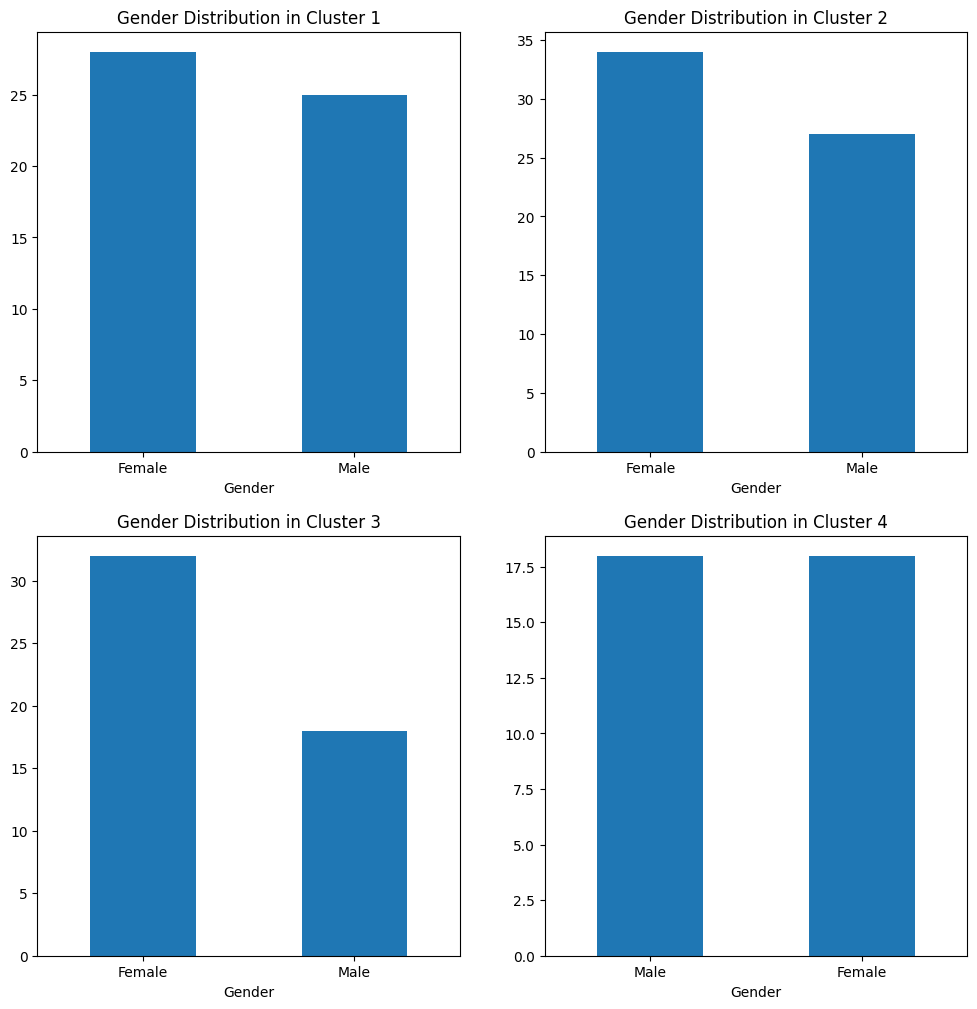

In [ ]:
g1 = mall_data[kmeans_mall.labels_ == 0]
g2 = mall_data[kmeans_mall.labels_ == 1]
g3 = mall_data[kmeans_mall.labels_ == 2]
g4 = mall_data[kmeans_mall.labels_ == 3]

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
g1['Gender'].value_counts().plot(kind='bar', title='Gender Distribution in Cluster 1')
plt.xticks(rotation=0)
plt.subplot(2, 2, 2)
g2['Gender'].value_counts().plot(kind='bar', title='Gender Distribution in Cluster 2')
plt.xticks(rotation=0)
plt.subplot(2, 2, 3)
g3['Gender'].value_counts().plot(kind='bar', title='Gender Distribution in Cluster 3')
plt.xticks(rotation=0)
plt.subplot(2, 2, 4)
g4['Gender'].value_counts().plot(kind='bar', title='Gender Distribution in Cluster 4')
plt.xticks(rotation=0)

Based on silhouette score we get optimal $k=4$ groups:
- Group 1: Aged 40-70 with Income 20-80 k$
- Group 2: Aged 20-60 with Income 50-90 k$
- Group 3: Aged 20-60 with Income 10-40 k$
- Group 4: Aged 30-60 with Income 90-140 k$

We can observe that in the group 3 there is a female majority (almost ~90% more), where in the rest of the groups diffrence is not very significant.
Another thing to note is that in the group with the highiest income there is 50/50 split among genders.